In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('heart_failure_clinical_records_dataset[1].csv')
data.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data['age']= data['age'].astype('int64')
data['DEATH_EVENT'] = data['DEATH_EVENT'].astype('bool')
data['anaemia'] = data['anaemia'].astype('bool')
data['diabetes'] = data['diabetes'].astype('bool')
data['high_blood_pressure'] = data['high_blood_pressure'].astype('bool')
data['sex'] = data['sex'].astype('bool')
data['smoking'] = data['smoking'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    bool   
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    bool   
dtypes: bool(6), float64(2), int64(5)
memory usage: 18.2 KB


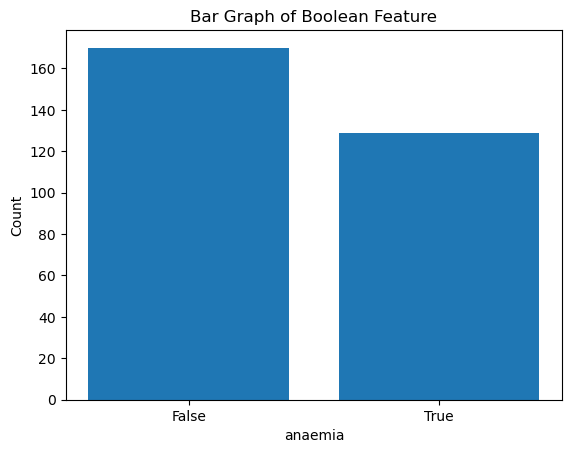

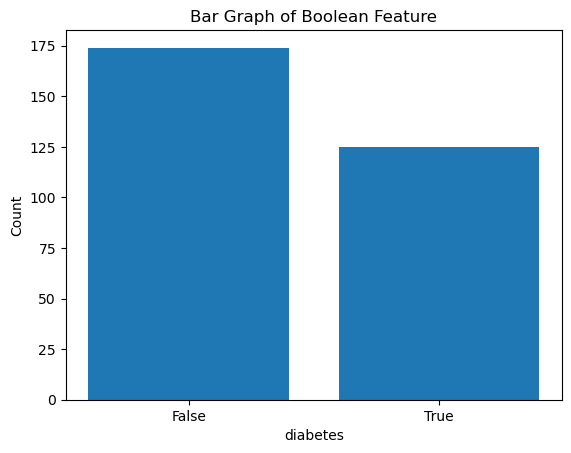

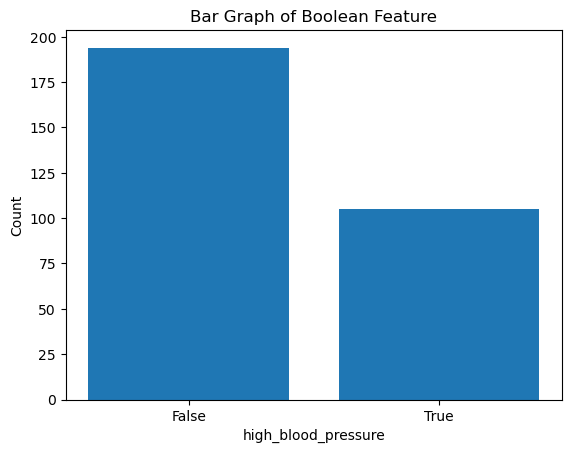

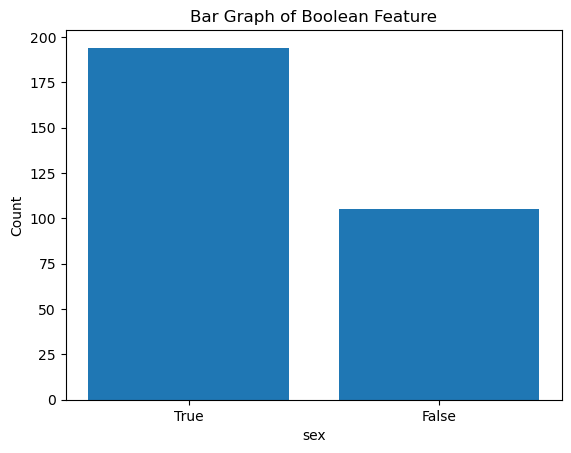

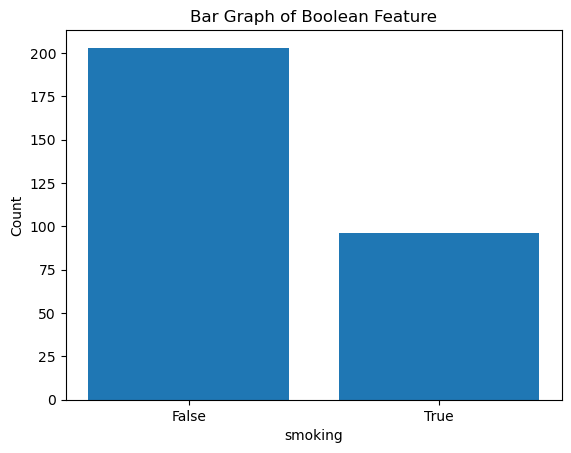

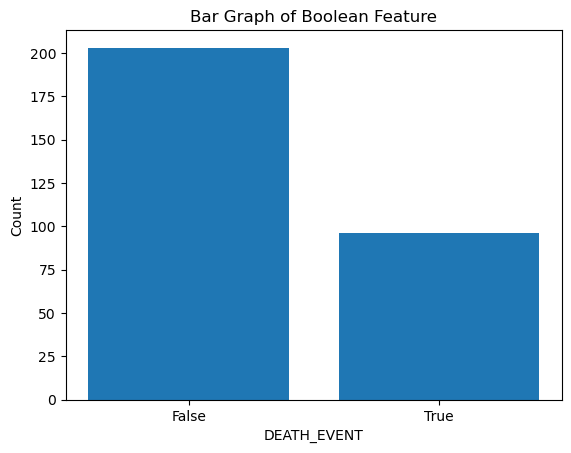

In [8]:
for _ in data:
    if data[_].dtype == 'bool':
        bool_counts = data[_].value_counts()
        plt.bar(bool_counts.index.astype(str), bool_counts)
        plt.xlabel(_)
        plt.ylabel('Count')
        plt.title('Bar Graph of Boolean Feature')
        plt.show()

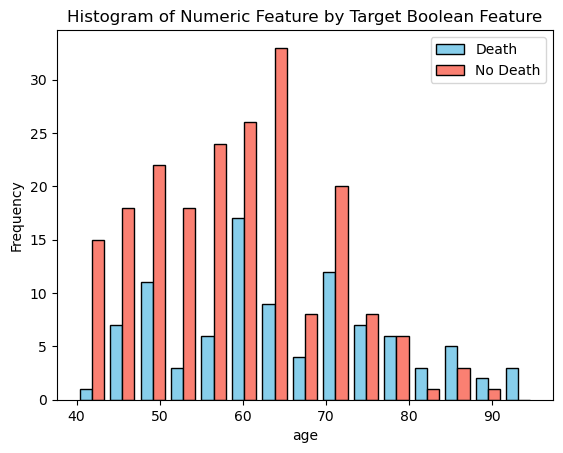

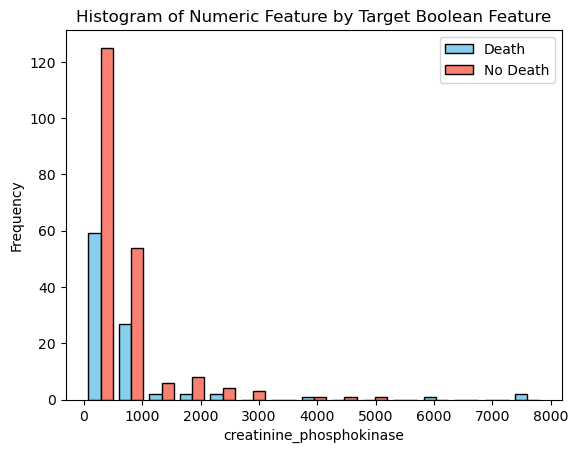

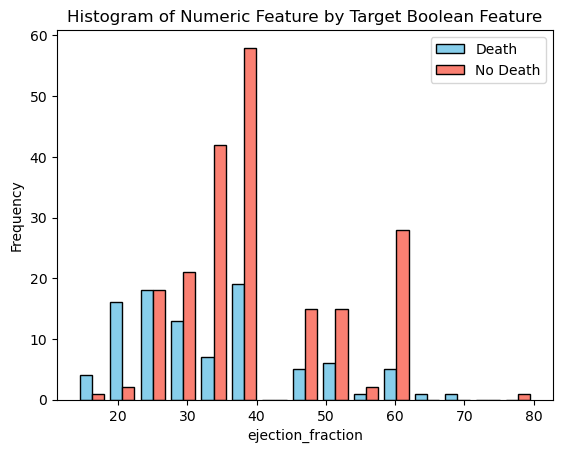

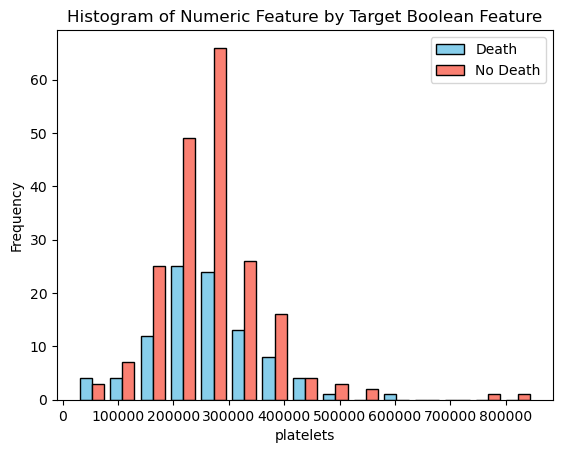

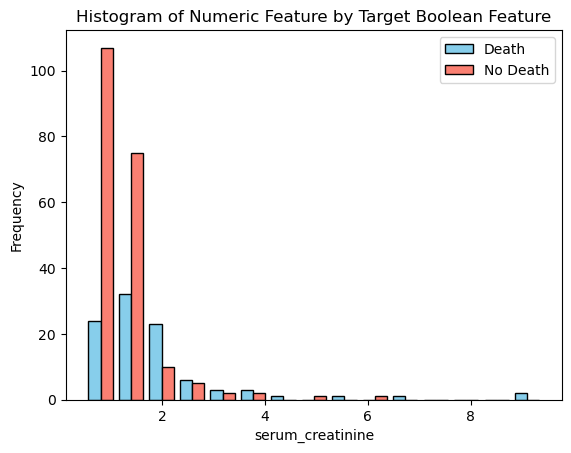

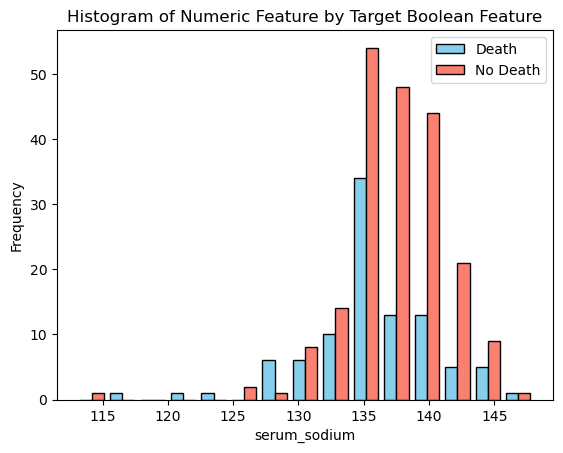

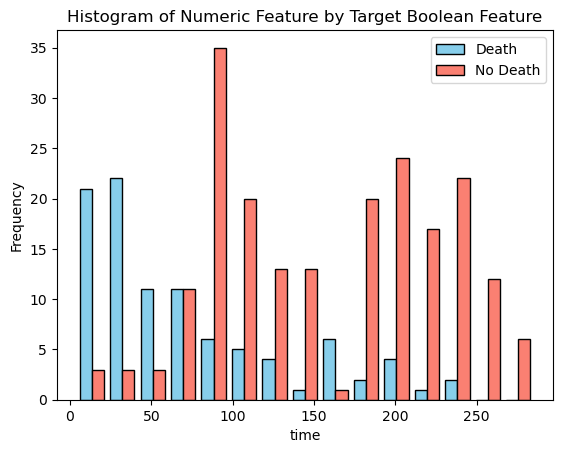

In [9]:
def hist(df,feature,target):
    numeric_feature_true = [df[feature][i] for i in range(len(df[feature])) if df[target][i]]
    numeric_feature_false = [df[feature][i] for i in range(len(df[feature])) if not df[target][i]]
    plt.hist([numeric_feature_true, numeric_feature_false], bins=15, color=['skyblue', 'salmon'], edgecolor='black', label=['Death', 'No Death'])
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Histogram of Numeric Feature by Target Boolean Feature')
    plt.legend()
    return plt.show()

features = data.iloc[:, :-1]
for _ in features:
    if features[_].dtype != 'bool'and features[_].dtype != 'object':
        hist(data,_,'DEATH_EVENT')

In [10]:
int_float_data = pd.DataFrame([data[_] for _ in data if data[_].dtype != 'bool']).T

In [11]:
# Checking if there exists any duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows.count()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

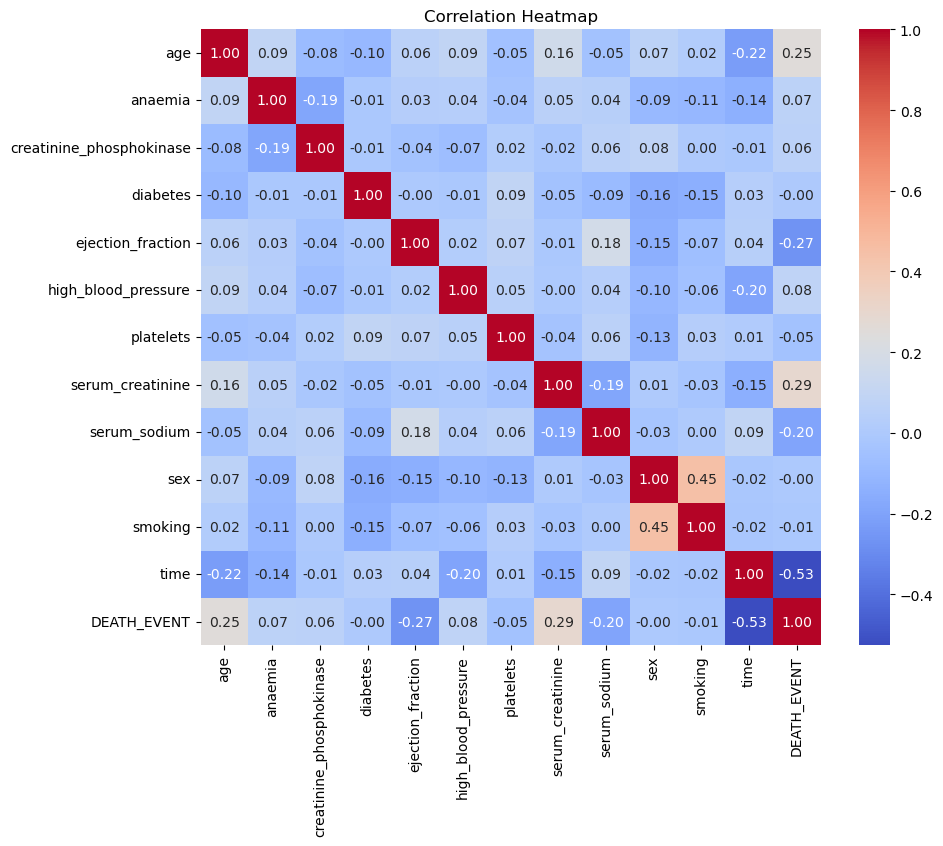

In [12]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

In [16]:
params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
}

In [17]:
scoring = ['accuracy', 'roc_auc']

Model: Logistic Regression
Best hyperparameters: {'C': 1}
Best accuracy score: 0.8322695035460992
AUC-ROC score on test set: 0.824


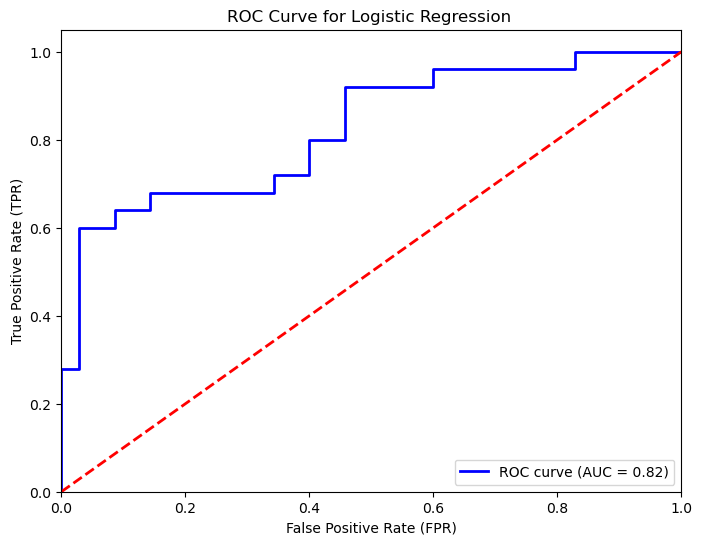



Model: Decision Tree
Best hyperparameters: {'max_depth': 3, 'min_samples_split': 5}
Best accuracy score: 0.8325354609929079
AUC-ROC score on test set: 0.7108571428571427


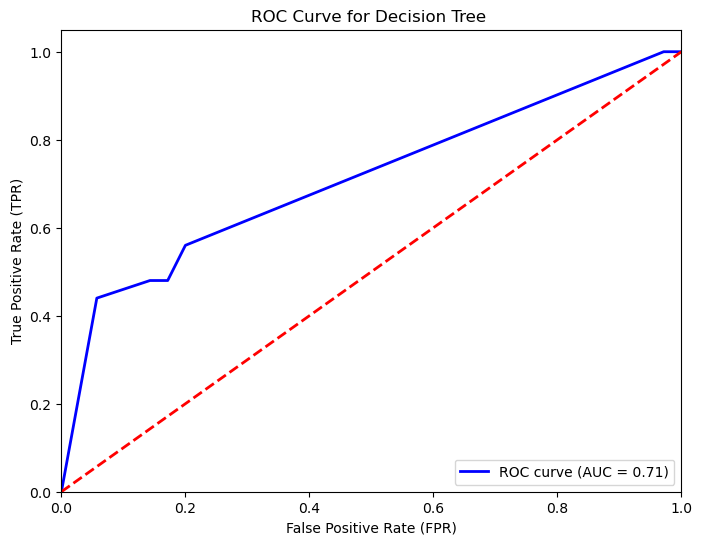



Model: Random Forest
Best hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Best accuracy score: 0.8954787234042554
AUC-ROC score on test set: 0.8280000000000001


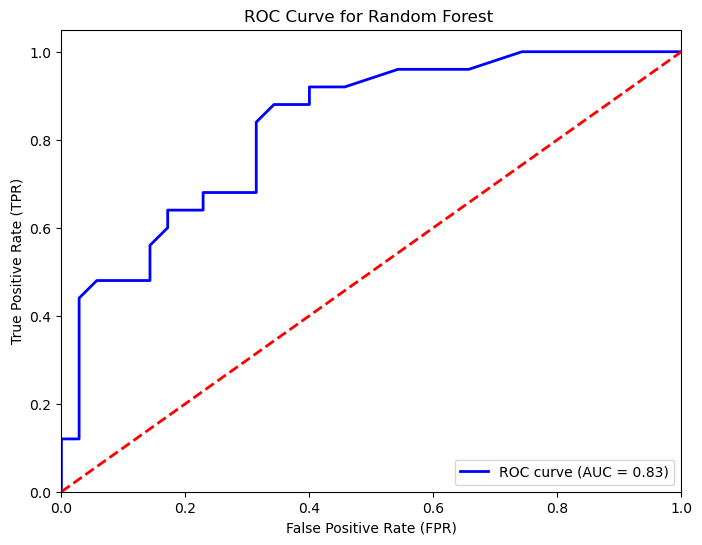



Model: XGBoost
Best hyperparameters: {'max_depth': 5, 'n_estimators': 300}
Best accuracy score: 0.8663120567375888
AUC-ROC score on test set: 0.8857142857142857


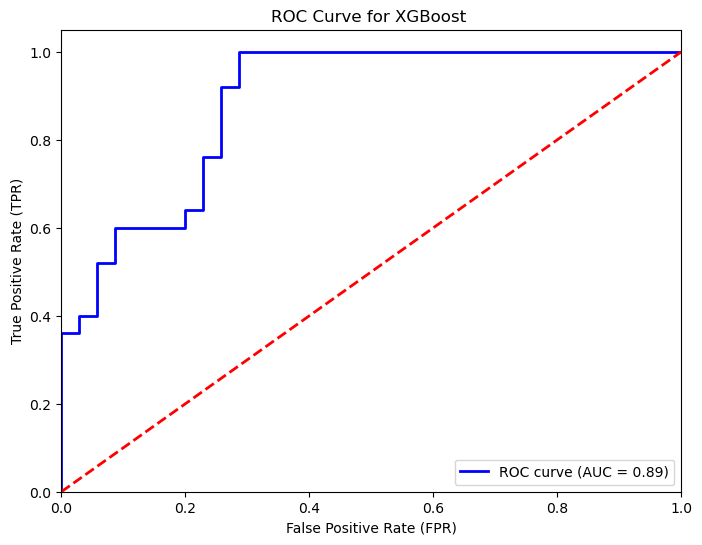

In [18]:
for model_name, model in models.items():
    print(f"Model: {model_name}")
    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring=scoring, refit='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    print(f"Best hyperparameters: {grid_search.best_params_}")
    print(f"Best accuracy score: {grid_search.best_score_}")
    y_pred_proba = grid_search.predict_proba(X_test_scaled)[:, 1]
    auc_roc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC score on test set: {auc_roc_score}")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_name} ')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

In [19]:
!pip3 install eli5

In [ ]:
print(X_test.dtypes)

# Convert object columns to categorical type
object_columns = X_test.select_dtypes(include=['object']).columns
X_test[object_columns] = X_test[object_columns].astype('category')

# Verify that all columns are of supported types
print(X_test.dtypes)

In [23]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model (replace X_train and y_train with your data)
model = LogisticRegression()
model.fit(X_train, y_train)

# Visualize feature weights
eli5.show_weights(model)

# Explain specific predictions
# Pick a row with negative label
negative_sample_index = y_test[y_test == 0].index[0]
negative_sample = X_test.loc[negative_sample_index]
print("Negative Sample:")
print(negative_sample)

# Explain the prediction for the negative sample
print("Explanation for Negative Sample Prediction:")
eli5.show_prediction(model, doc=negative_sample)

# Pick a row with positive label
positive_sample_index = y_test[y_test == 1].index[0]
positive_sample = X_test.loc[positive_sample_index]
print("\nPositive Sample:")
print(positive_sample)

# Explain the prediction for the positive sample
print("Explanation for Positive Sample Prediction:")
eli5.show_prediction(model, doc=positive_sample)

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\meetb\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [21]:
!pip3 uninstall scikit-learn

^C


In [22]:
!pip3 install scikit-learn